In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import math

In [2]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

In [3]:
def calcSqDistances(X, Kmus):
    sqDmat = []
    for mean in Kmus:
        norm_array = []
        for point in X:
            norm_array.append(np.linalg.norm(point - mean))
        sqDmat.append(norm_array)
    return np.array(sqDmat).T

In [4]:
def determineRnk(sqDmat):
    mean_rank = []
    for i in sqDmat:
        cluster_val = []
        for j in i: 
            closest = i.min()
            if j == closest:
                cluster_val.append(1)
            else: 
                cluster_val.append(0)
        mean_rank.append(cluster_val)
    return np.array(mean_rank)

In [5]:
def recalcMus(X, Rnk):
    # Fill this
    N = np.shape(X)[0]#13569
    k = np.shape(Rnk)[1] #2
    
    
    Kmus = np.empty(shape=(k,np.shape(X)[1]),dtype='object')
    
    for i in range(k):#0-1
        cluster_sum = np.zeros(np.shape(X)[1])
        count = 0
        
        for j in range(N): #from 0-13568
            cluster_sum = cluster_sum + Rnk[j][i]*X[j]
            count += Rnk[j][i]
        
        Kmus[i] = cluster_sum/count ##gives the actual means 
        #Kmus.insert(Kmus, i, (cluster_sum/count))
        #np.put(Kmus,i, (cluster_sum/count)) ### this is producing the error 
    
    return Kmus

In [6]:
def wcss(Kmus, K, X, Rnk):
    sum_ = 0
    sum_k = 0
    for k in range(K):
        sum_ += sum_k
        sum_k = np.zeros(np.shape(X)[1])
        count_k = 0
        for j in range(np.shape(X)[0]):#loop through 13569 times 
            if(Rnk[j][k] == 1): #since the indices in Rnk correspond to the value in X take the k value of the jth rank
                sum_k = sum_k + (X[j] - Kmus[k])**2 #take the value at index j subtract by the corresponding mu
                count_k += 1
            else: 
                continue
        #print("Mean",k, "WCSS: ", math.sqrt(np.sum(sum_k))/count_k)
        sum_k = math.sqrt(np.sum(sum_k))/count_k
        
    return sum_

In [7]:
def runKMeans(K, csv_filepath):
    # Load cleaned data in
    data = pd.read_csv(csv_filepath)
    
    ##break the columns into lists of their own and combine then into one array
    #x_col = data[X_col]
    #y_col = data[Y_col]
    #dimensions = []
    
    #for num in range(0,len(data[X_col])):
        #dimensions.append([x_col[num], y_col[num]])
    
    #dimensions = np.array(dimensions)
    
    #X = dimensions 
    X = data.drop(['Unnamed: 0', 'Brand', 'Model', 'Added'], axis = 1)
    X = np.array(X)
    
    # Determine and store data set information; N is the number of objects, D is the number of attributes
    N,D = X.shape

    # Allocate space for the K mu vectors
    Kmus = np.zeros((K, D))
    
    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    
    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # Assign each data vector to closest mu vector 
        # Do this by first calculating a squared distance matrix where the n,k entry
        # contains the squared distance from the nth data vector to the kth mu vector

        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        
        sqDmat = calcSqDistances(X, Kmus);
        
        # given the matrix of squared distances, determine the closest cluster center for each data vector 

        # R is the "responsibility" matrix
        # R will be an N-by-K matrix of binary values whose n,k entry is set as 
        # Specifically, the n,k entry is 1 if point n is closest to cluster k,
        # and is 0 otherwise
        Rnk = determineRnk(sqDmat)
        
        KmusOld = Kmus
        #plotCurrent(X, Rnk, Kmus)
        #plt.show()

        # Recalculate mu values based on cluster assignments
        Kmus = recalcMus(X, Rnk)

        # If old cluster means are relatively close to the new cluster means,then break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break

    #plotCurrent(X,Rnk,Kmus)
    
    rnk = Rnk.tolist()
    data['Rank'] = rnk
    
    data
    return Kmus,X, Rnk #data

In [8]:
def plot(Range,csv_filepath):
    for i in range(2,Range + 1):
        Kmus,X,Rnk = runKMeans(i,csv_filepath)
        WCSS = wcss(Kmus,i, X, Rnk)
        plt.plot(i, WCSS, marker='D')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Within groups sum of squares")

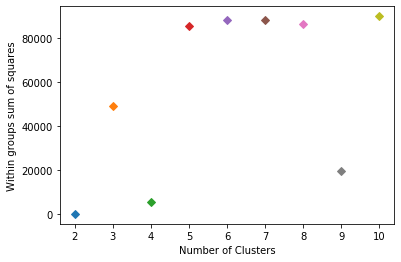

In [9]:
plot(10,'encoded_smartphone_data.csv')

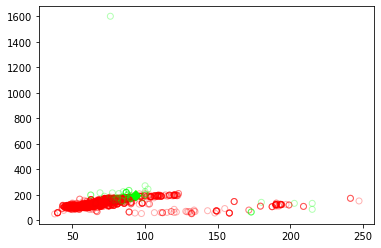

In [10]:
Kmus,X, Rnk = runKMeans(2,"encoded_smartphone_data.csv")
plotCurrent(X,Rnk,Kmus)